# CREDIT CARD-Segmentation-CASE STUDY

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)


plt.rcParams['figure.figsize'] = 6, 5
plt.rcParams['axes.grid'] = True

In [276]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [277]:
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis

## Data Import

In [278]:
# reading data into dataframe
card= pd.read_csv("CC_GENERAL.csv")

## UDFs

In [279]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(),(x.isna().sum()/x.isna().count())*100, x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'PERCENT_MISSING','SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [308]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [280]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x):
    x=x.fillna(x.median())
    return x

In [281]:
def outlier_treatment(x):
    x=np.log(x+1)
    return x

In [282]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

## Data inspection

In [283]:
card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [284]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

## Pandas Profiling

In [285]:
#import pandas_profiling 
#pandas_profiling.ProfileReport(card)

## Removing unnecessary variables

In [286]:
card=card.drop(labels='CUST_ID', axis=1)   #Cust_id  is useless

In [287]:
card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Missing value Treatment

In [288]:
card=card.apply(missing_imputation)

In [289]:
card.apply(continuous_var_summary).T.round(2)

,N,NMISS,PERCENT_MISSING,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


## Deriving new KPIs

#### Monthly average purchase and cash advance amount

In [290]:
card['Monthly_average_purchase']=card['PURCHASES']/card['TENURE']

In [291]:
card['Monthly_average_purchase'].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_average_purchase, dtype: float64

In [292]:
card['Monthly_cash_advance_amount']=card['CASH_ADVANCE']/card['TENURE']

In [293]:
card['Monthly_cash_advance_amount'].head()

0      0.000000
1    536.912124
2      0.000000
3     17.149001
4      0.000000
Name: Monthly_cash_advance_amount, dtype: float64

#### Purchases by type

In [294]:
def purchase(card):
    if (card['ONEOFF_PURCHASES']==0) & (card['INSTALLMENTS_PURCHASES']==0):
        return 'no_type'
    elif (card['ONEOFF_PURCHASES']>0) & (card['INSTALLMENTS_PURCHASES']==0):
        return 'one_off'
    elif (card['ONEOFF_PURCHASES']==0) & (card['INSTALLMENTS_PURCHASES']>0):
        return 'installment'
    elif (card['ONEOFF_PURCHASES']>0) & (card['INSTALLMENTS_PURCHASES']>0):
        return 'both_type'

In [295]:
card['purchase_by_type']=card.apply(purchase, axis=1)

In [296]:
card['purchase_by_type'].value_counts()

both_type      2774
installment    2260
no_type        2042
one_off        1874
Name: purchase_by_type, dtype: int64

#### Limit usage (balance to credit limit ratio)

In [297]:
card['Limit_usage']=card['BALANCE']/card['CREDIT_LIMIT']

In [298]:
card.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_average_purchase,Monthly_cash_advance_amount,purchase_by_type,Limit_usage
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment,0.040901
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,no_type,0.457495
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,one_off,0.332687
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,one_off,0.222223
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,one_off,0.681429


#### Payments to minimum payments ratio

In [299]:
card['Payments_ratio']=card['PAYMENTS']/card['MINIMUM_PAYMENTS']

In [300]:
card['Payments_ratio'].head()

0    1.446508
1    3.826241
2    0.991682
3    0.000000
4    2.771075
Name: Payments_ratio, dtype: float64

## Separating numerical and categorical data

In [301]:
#Numerical data
card_num=card.select_dtypes(['int64', 'float64'])

In [302]:
#categorical data
card_cat=card.select_dtypes(['object'])

In [303]:
card_num.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_average_purchase', 'Monthly_cash_advance_amount',
       'Limit_usage', 'Payments_ratio'],
      dtype='object')

In [304]:
card_cat.columns

Index(['purchase_by_type'], dtype='object')

In [306]:
card_num.apply(continuous_var_summary).T.round(2)      #summary of continuous data

,N,NMISS,PERCENT_MISSING,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,0.0,14002049.71,1564.47,873.39,2081.53,4332774.97,0.00,0.07,8.81,23.58,128.28,873.39,2054.14,4338.56,5909.11,9338.80,19043.14
BALANCE_FREQUENCY,8950.0,0.0,0.0,7851.57,0.88,1.00,0.24,0.06,0.00,0.09,0.27,0.45,0.89,1.00,1.00,1.00,1.00,1.00,1.00
PURCHASES,8950.0,0.0,0.0,8978683.26,1003.20,361.28,2136.63,4565208.19,0.00,0.00,0.00,0.00,39.64,361.28,1110.13,2542.62,3998.62,8977.29,49039.57
ONEOFF_PURCHASES,8950.0,0.0,0.0,5302314.47,592.44,38.00,1659.89,2755227.90,0.00,0.00,0.00,0.00,0.00,38.00,577.41,1600.10,2671.09,6689.90,40761.25
INSTALLMENTS_PURCHASES,8950.0,0.0,0.0,3679055.42,411.07,89.00,904.34,817827.43,0.00,0.00,0.00,0.00,0.00,89.00,468.64,1140.07,1750.09,3886.24,22500.00
CASH_ADVANCE,8950.0,0.0,0.0,8760896.46,978.87,0.00,2097.16,4398096.33,0.00,0.00,0.00,0.00,0.00,0.00,1113.82,3065.53,4647.17,9588.16,47137.21
PURCHASES_FREQUENCY,8950.0,0.0,0.0,4388.64,0.49,0.50,0.40,0.16,0.00,0.00,0.00,0.00,0.08,0.50,0.92,1.00,1.00,1.00,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,0.0,1812.00,0.20,0.08,0.30,0.09,0.00,0.00,0.00,0.00,0.00,0.08,0.30,0.75,1.00,1.00,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,0.0,3261.71,0.36,0.17,0.40,0.16,0.00,0.00,0.00,0.00,0.00,0.17,0.75,1.00,1.00,1.00,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.0,0.0,1209.54,0.14,0.00,0.20,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.42,0.58,0.83,1.50


In [309]:
card_cat.apply(categorical_var_summary).T.round(2)     #summary of categorical data

,N,NMISS,MODE,FREQ,PERCENT
purchase_by_type,8950,0,both_type,2774,30.99


## Outlier treatment

In [310]:
card_num=card_num.apply(outlier_treatment)

In [311]:
card_num.apply(continuous_var_summary).T.round(2)

,N,NMISS,PERCENT_MISSING,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
BALANCE,8950.0,0.0,0.0,55146.65,6.16,6.77,2.01,4.05,0.00,0.06,2.28,3.20,4.86,6.77,7.63,8.38,8.68,9.14,9.85
BALANCE_FREQUENCY,8950.0,0.0,0.0,5548.46,0.62,0.69,0.15,0.02,0.00,0.09,0.24,0.37,0.64,0.69,0.69,0.69,0.69,0.69,0.69
PURCHASES,8950.0,0.0,0.0,43851.84,4.90,5.89,2.92,8.51,0.00,0.00,0.00,0.00,3.70,5.89,7.01,7.84,8.29,9.10,10.80
ONEOFF_PURCHASES,8950.0,0.0,0.0,28678.25,3.20,3.66,3.25,10.54,0.00,0.00,0.00,0.00,0.00,3.66,6.36,7.38,7.89,8.81,10.62
INSTALLMENTS_PURCHASES,8950.0,0.0,0.0,30004.01,3.35,4.50,3.08,9.50,0.00,0.00,0.00,0.00,0.00,4.50,6.15,7.04,7.47,8.27,10.02
CASH_ADVANCE,8950.0,0.0,0.0,29705.82,3.32,0.00,3.57,12.72,0.00,0.00,0.00,0.00,0.00,0.00,7.02,8.03,8.44,9.17,10.76
PURCHASES_FREQUENCY,8950.0,0.0,0.0,3233.34,0.36,0.41,0.28,0.08,0.00,0.00,0.00,0.00,0.08,0.41,0.65,0.69,0.69,0.69,0.69
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.0,0.0,1420.36,0.16,0.08,0.22,0.05,0.00,0.00,0.00,0.00,0.00,0.08,0.26,0.56,0.69,0.69,0.69
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.0,0.0,2417.14,0.27,0.15,0.28,0.08,0.00,0.00,0.00,0.00,0.00,0.15,0.56,0.69,0.69,0.69,0.69
CASH_ADVANCE_FREQUENCY,8950.0,0.0,0.0,1015.94,0.11,0.00,0.16,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.35,0.46,0.61,0.92


In [312]:
card=pd.concat([card_num, card_cat], axis=1)                       
#concatenating categorical and continuous columns(Purchase_by_typeis the derived column which is categorical)

## Dropping redundant columns

In [313]:
card=card.drop(labels=['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], axis=1)

In [314]:
card.shape

(8950, 14)

In [315]:
card.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,Monthly_cash_advance_amount,Limit_usage,Payments_ratio,purchase_by_type
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,installment
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,no_type
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,one_off
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,one_off
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,one_off


In [316]:
card.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance_amount', 'Limit_usage', 'Payments_ratio',
       'purchase_by_type'],
      dtype='object')

## Insights from KPIs

In [317]:
summary1=card.groupby('purchase_by_type')['Monthly_average_purchase'].mean()

In [318]:
summary1

purchase_by_type
both_type      4.765783
installment    3.358409
no_type        0.000000
one_off        3.465881
Name: Monthly_average_purchase, dtype: float64

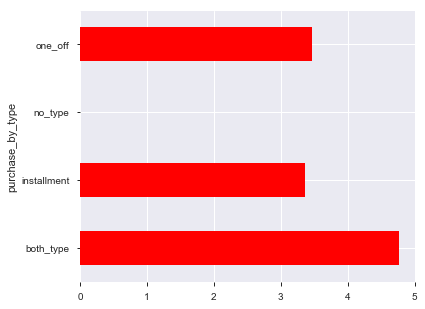

In [319]:
summary1.plot(kind='barh', color='r')
plt.show()

- **The monthly average purchase is greatest for customers having purchase type of both onoff and installment(both_type)**

In [320]:
summary2=card.groupby('purchase_by_type')['Monthly_cash_advance_amount'].mean()

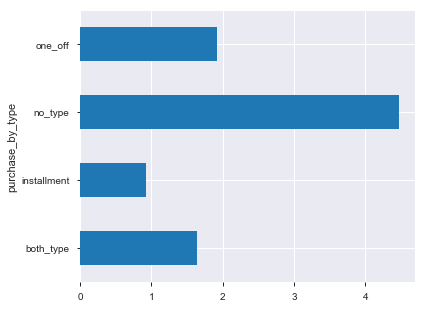

In [321]:
summary2.plot(kind='barh')
plt.show()

- **The customers having purchase type as none(neither oneoff nor installments) have the highest monthly cash advance amount**

In [322]:
summary3=card.groupby('purchase_by_type')['Limit_usage'].mean()

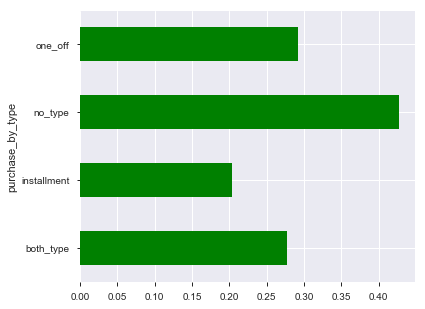

In [323]:
summary3.plot(kind='barh', color='g')
plt.show()

- **The customers having purchase type as neither oneoff nor installments have highest limit usage.**

In [324]:
summary4=card.groupby('purchase_by_type')['Limit_usage'].mean()

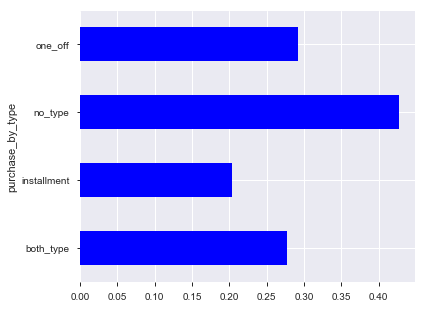

In [325]:
summary4.plot(kind='barh',color='b')
plt.show()

- **The customers having puchase type as no type have the highest payment ratio, that is they pay the highest.**

## Generating Heatmap

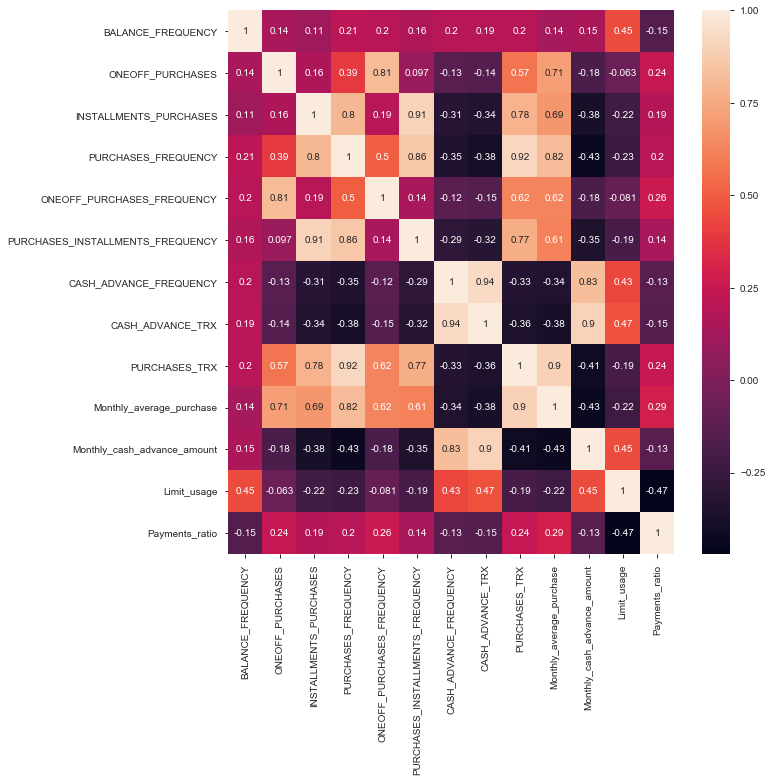

In [326]:
plt.figure(figsize=(10,10))
sns.heatmap(card.corr(), annot=True)

In [327]:
card.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance_amount', 'Limit_usage', 'Payments_ratio',
       'purchase_by_type'],
      dtype='object')

## Dummy creation

In [328]:
# for c_feature in categorical_features
card['purchase_by_type'] = card['purchase_by_type'].astype('category')
card = create_dummies(card, 'purchase_by_type')
    
# see the data in the output
card

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,Monthly_cash_advance_amount,Limit_usage,Payments_ratio,purchase_by_type_both_type,purchase_by_type_installment,purchase_by_type_no_type,purchase_by_type_one_off
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,0.000000,0.040086,0.894662,0,1,0,0
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287695,0.376719,1.574068,0,0,1,0
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,0.000000,0.287197,0.688979,0,0,0,1
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,2.898616,0.200671,0.000000,0,0,0,1
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,0.000000,0.519644,1.327360,0,0,0,1
5,0.693147,0.000000,7.196147,0.510826,0.000000,0.459532,0.000000,0.000000,2.197225,4.719451,0.000000,0.695874,0.458438,0,1,0,0
6,0.693147,8.764620,6.535793,0.693147,0.693147,0.693147,0.000000,0.000000,4.174387,6.383367,0.000000,0.045417,3.498984,1,0,0,0
7,0.693147,0.000000,6.080391,0.693147,0.000000,0.693147,0.000000,0.000000,2.564949,3.620333,0.000000,0.583830,0.822576,0,1,0,0
8,0.693147,6.496005,5.303305,0.287682,0.080042,0.223144,0.000000,0.000000,1.791759,4.287590,0.000000,0.135395,1.165111,1,0,0,0
9,0.435318,7.156645,0.000000,0.154151,0.154151,0.000000,0.000000,0.000000,1.386294,4.680278,0.000000,0.013744,2.534697,0,0,0,1


In [329]:
card.columns

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_average_purchase',
       'Monthly_cash_advance_amount', 'Limit_usage', 'Payments_ratio',
       'purchase_by_type_both_type', 'purchase_by_type_installment',
       'purchase_by_type_no_type', 'purchase_by_type_one_off'],
      dtype='object')

In [330]:
card.shape

(8950, 17)

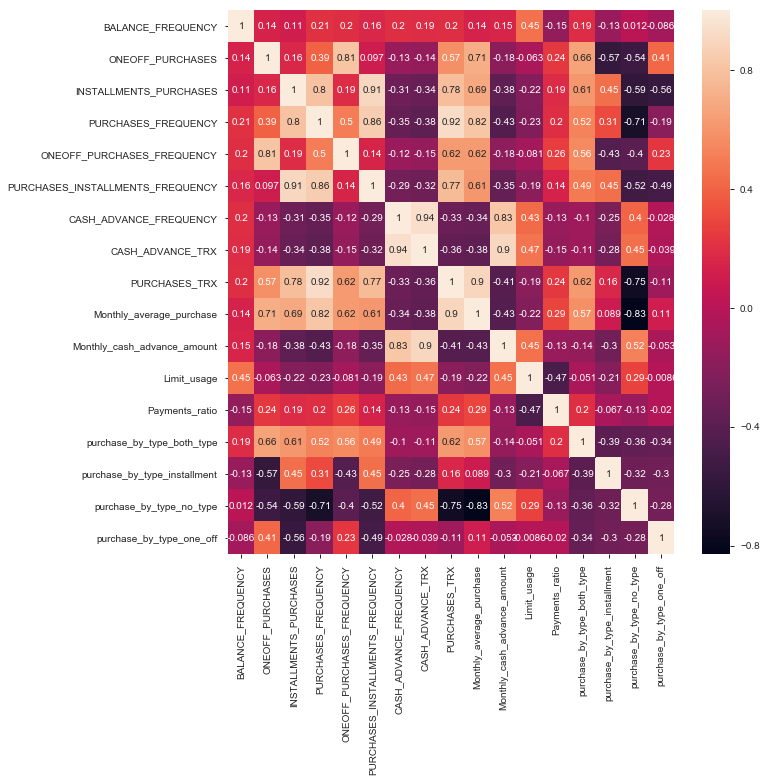

In [331]:
plt.figure(figsize=(10,10))
sns.heatmap(card.corr(), annot=True)

- **According to the Heatmap, PURCHASES_INSTALLMENTS_FREQUENCY is highly correlated with PURCHASES_FREQUENCY**
- **MONTHLY_AVERAGE_PURCHASES is highly correlated with ONE_OFF_PURCHASES.**

## Standardize data

In [332]:
#Distance based technique require scaled data
sc=StandardScaler()

card_scaled=sc.fit_transform(card)

In [333]:
pd.DataFrame(card_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.148757,-0.987090,0.394480,-0.746901,-0.732480,-0.674253,-0.724360,-0.810069,-0.579510,-0.429030,-0.890667,-1.022796,-0.492437,-0.670193,1.720516,-0.543690,-0.514625
1,0.179616,-0.987090,-1.087454,-1.302799,-0.732480,-0.958256,0.699592,0.784603,-1.379210,-1.523373,1.697282,0.322182,0.230261,-0.670193,-0.581221,1.839282,-0.514625
2,0.492710,1.062022,-1.087454,1.196820,2.466762,-0.958256,-0.724360,-0.810069,0.487865,0.564294,-0.890667,-0.035495,-0.711225,-0.670193,-0.581221,-0.543690,1.943162
3,-0.857867,1.265778,-1.087454,-1.014151,-0.363042,-0.958256,-0.213583,-0.123281,-0.874655,0.891164,0.302372,-0.381199,-1.444107,-0.670193,-0.581221,-0.543690,1.943162
4,0.492710,-0.114307,-1.087454,-1.014151,-0.363042,-0.958256,-0.724360,-0.810069,-0.874655,-1.100298,-0.890667,0.893219,-0.032167,-0.670193,-0.581221,-0.543690,1.943162
5,0.492710,-0.987090,1.246835,0.539335,-0.732480,0.672236,-0.724360,-0.810069,0.220191,0.833158,-0.890667,1.597325,-0.956457,-0.670193,1.720516,-0.543690,-0.514625
6,0.492710,1.712887,1.032629,1.196820,2.466762,1.501139,-0.724360,-0.810069,1.659405,1.663990,-0.890667,-1.001500,2.277834,1.492109,-0.581221,-0.543690,-0.514625
7,0.492710,-0.987090,0.884905,1.196820,-0.732480,1.501139,-0.724360,-0.810069,0.487865,0.284343,-0.890667,1.149669,-0.569116,-0.670193,1.720516,-0.543690,-0.514625
8,0.492710,1.014031,0.632834,-0.265364,-0.363042,-0.166508,-0.724360,-0.810069,-0.074955,0.617520,-0.890667,-0.642000,-0.204754,1.492109,-0.581221,-0.543690,-0.514625
9,-1.242561,1.217544,-1.087454,-0.746901,-0.020992,-0.958256,-0.724360,-0.810069,-0.370100,0.813598,-0.890667,-1.128045,1.252102,-0.670193,-0.581221,-0.543690,1.943162


## Apply PCA

In [334]:
pc = PCA(n_components=17)          #calculate to all variables

In [335]:
pc.fit(card_scaled)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [336]:
pc.explained_variance_          #variance of each variable

array([6.83574755e+00, 3.07030693e+00, 2.50427698e+00, 1.38746289e+00,
       1.11381660e+00, 7.07171316e-01, 3.81578416e-01, 3.48859935e-01,
       2.10267642e-01, 1.63404412e-01, 1.04309243e-01, 5.15189894e-02,
       4.48128475e-02, 4.37107547e-02, 2.84672582e-02, 6.18788699e-03,
       1.92836818e-31])

In [337]:
#Eigen values
sum(pc.explained_variance_)

17.00189965359259

In [338]:
#Cumulative Variance explains
var=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
var

array([ 40.21,  58.27,  73.  ,  81.16,  87.71,  91.87,  94.11,  96.16,
        97.4 ,  98.36,  98.97,  99.27,  99.53,  99.79,  99.96, 100.  ,
       100.  ])

In [339]:
pd.DataFrame({'Eigen_value': pc.explained_variance_, 'Cumm_variance':var}, index=range(1,18)).round(3)

,Eigen_value,Cumm_variance
1,6.836,40.21
2,3.070,58.27
3,2.504,73.00
4,1.387,81.16
5,1.114,87.71
6,0.707,91.87
7,0.382,94.11
8,0.349,96.16
9,0.210,97.40
10,0.163,98.36


In [374]:
# The components are takn to be 6 as the maximum variance and the eigen value ~ 1(>70%) is achieved when there are 6 components.
pc_final=PCA(n_components=6).fit(card_scaled)

In [375]:
pc_final.explained_variance_

array([6.83574755, 3.07030693, 2.50427698, 1.38746289, 1.1138166 ,
       0.70717132])

In [376]:
reduced_cr=pc_final.fit_transform(card_scaled)  # the out put is Factors (F1, F2, ...F9)

In [377]:
dimensions = pd.DataFrame(reduced_cr)

In [378]:
dimensions.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6"]

In [379]:
dimensions

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.242841,-2.759668,0.343061,-0.417359,-0.007100,0.019755
1,-3.975652,0.144625,-0.542989,1.023832,-0.428929,-0.572463
2,1.287396,1.508938,2.709966,-1.892252,0.010809,-0.599932
3,-1.047613,0.673103,2.501794,-1.306784,0.761348,1.408986
4,-1.451586,-0.176336,2.286074,-1.624896,-0.561969,-0.675214
5,1.166988,-1.948285,-1.522135,-2.182644,-0.219215,-0.081526
6,4.736369,1.585391,0.493930,1.770229,-0.417299,-1.196805
7,1.543426,-2.141559,-1.663893,-1.792658,-0.034327,-0.415331
8,1.527820,0.178269,0.503805,0.254611,-1.453263,0.480370
9,0.238800,-0.048139,3.750621,0.436066,0.886273,-0.113153


## Silhouette Coefficient (Check the value for different values of k)

In [380]:
from sklearn import metrics

In [381]:
# calculate SC for K=2 through K=12
k_range = range(2, 16)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(dimensions)
    scores.append(metrics.silhouette_score(dimensions, km.labels_))

In [382]:
scores

[0.332541670859795,
 0.35437912935073845,
 0.4370857743965947,
 0.4312114520971775,
 0.4220467595737721,
 0.4021778576552667,
 0.4180916253914013,
 0.390413277735384,
 0.36496505692492165,
 0.36790496081831986,
 0.36637587412232975,
 0.3405913171045801,
 0.3528765404198071,
 0.3422655486472436]

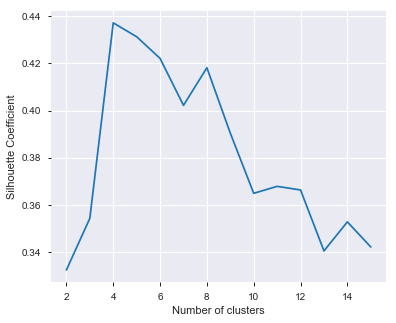

In [383]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

- **The solution can be 4 if we take highest SC score.**

## Segmentation

In [384]:
km_3=KMeans(n_clusters=3,random_state=123).fit(dimensions)
km_3.labels_

array([0, 1, 2, ..., 0, 1, 2])

In [385]:
km_4=KMeans(n_clusters=4,random_state=123).fit(dimensions)
km_4.labels_


array([2, 1, 0, ..., 2, 1, 0])

In [386]:
km_5=KMeans(n_clusters=5,random_state=123).fit(dimensions)
km_5.labels_

array([4, 2, 0, ..., 4, 2, 0])

In [387]:
km_6=KMeans(n_clusters=6,random_state=123).fit(dimensions)
km_6.labels_

array([5, 3, 2, ..., 5, 3, 2])

In [388]:
km_7=KMeans(n_clusters=7,random_state=123).fit(dimensions)
km_7.labels_

array([2, 1, 4, ..., 3, 1, 6])

In [389]:
km_8=KMeans(n_clusters=8,random_state=123).fit(dimensions)
km_8.labels_

array([1, 4, 3, ..., 1, 4, 2])

In [390]:
# save the cluster labels in the original data
card['cluster_3'] = km_3.labels_
card['cluster_4'] = km_4.labels_
card['cluster_5'] = km_5.labels_
card['cluster_6'] = km_6.labels_
card['cluster_7'] = km_7.labels_
card['cluster_8'] = km_8.labels_

In [391]:
card.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_average_purchase,...,purchase_by_type_both_type,purchase_by_type_installment,purchase_by_type_no_type,purchase_by_type_one_off,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,0.597837,0.000000,4.568506,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,2.191654,...,0,1,0,0,0,2,4,5,2,1
1,0.646627,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,...,0,0,1,0,1,1,2,3,1,4
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180994,...,0,0,0,1,2,0,0,2,4,3
3,0.492477,7.313220,0.000000,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,4.835620,...,0,0,0,1,1,0,0,2,4,3
4,0.693147,2.833213,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,0.847298,...,0,0,0,1,1,0,0,2,4,3


## Quantitative Analysis

In [392]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.382570
1    0.371173
0    0.246257
dtype: float64

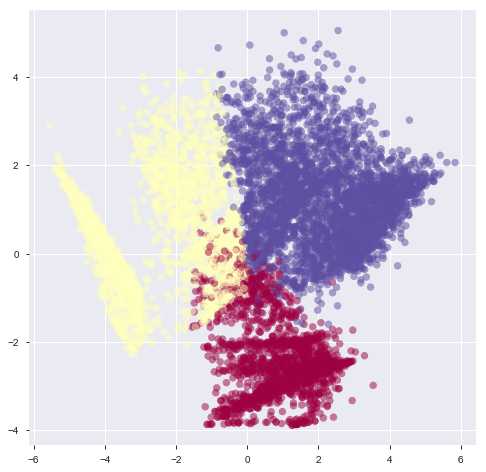

In [393]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_3.labels_, cmap='Spectral',alpha=0.5)


In [394]:
pd.Series(km_4.labels_).value_counts()/sum(pd.Series(km_4.labels_).value_counts())

3    0.309385
2    0.248492
1    0.233296
0    0.208827
dtype: float64

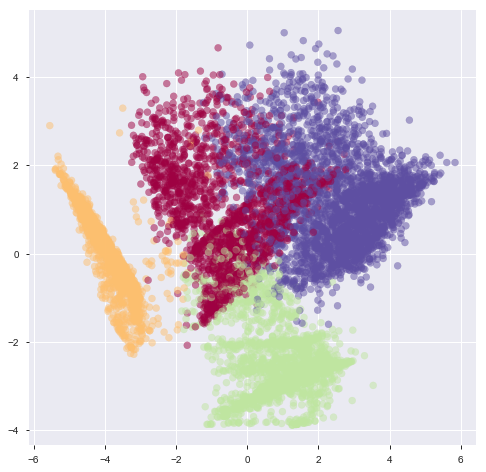

In [395]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_4.labels_, cmap='Spectral',alpha=0.5)

In [396]:
pd.Series(km_5.labels_).value_counts()/sum(pd.Series(km_5.labels_).value_counts())

4    0.240112
2    0.232514
1    0.220894
0    0.208045
3    0.098436
dtype: float64

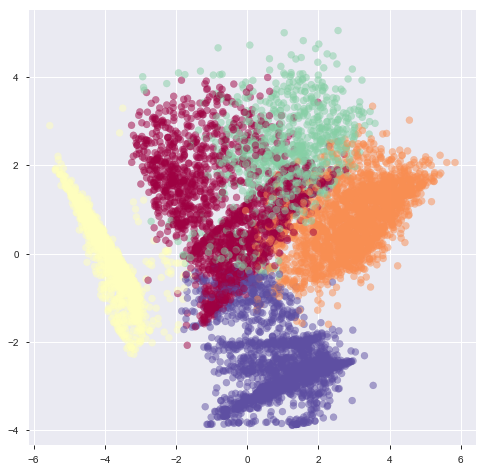

In [397]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_5.labels_, cmap='Spectral',alpha=0.5)


In [398]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

3    0.224693
0    0.214860
5    0.212849
2    0.177318
4    0.096536
1    0.073743
dtype: float64

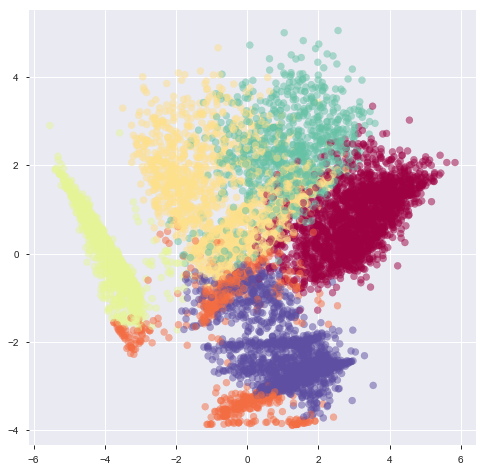

In [399]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_6.labels_, cmap='Spectral',alpha=0.5)

In [400]:
pd.Series(km_7.labels_).value_counts()/sum(pd.Series(km_7.labels_).value_counts())

1    0.231508
0    0.215307
3    0.182458
4    0.131397
5    0.094972
6    0.078101
2    0.066257
dtype: float64

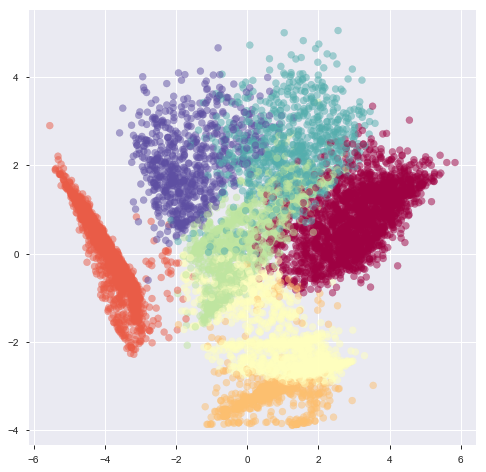

In [404]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_7.labels_, cmap='Spectral',alpha=0.5)


In [405]:
pd.Series(km_8.labels_).value_counts()/sum(pd.Series(km_8.labels_).value_counts())

4    0.219777
5    0.212737
1    0.175531
3    0.114525
0    0.092179
2    0.076648
7    0.061564
6    0.047039
dtype: float64

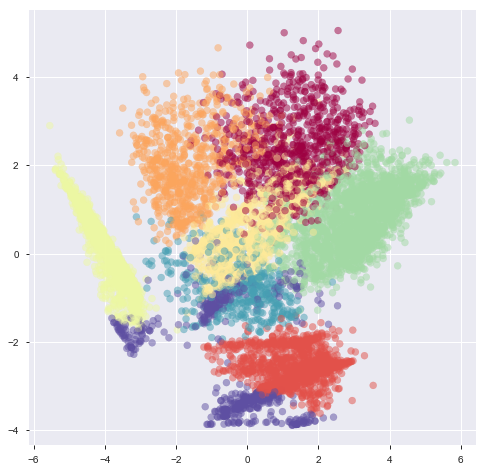

In [406]:
plt.figure(figsize=(8,8))
plt.scatter(reduced_cr[:,0],reduced_cr[:,1],c=km_8.labels_, cmap='Spectral',alpha=0.5)


From the above pairplots and quantitative analysis it can be concluded that:
- **The 4-cluster solution is better in segregating the data better.**
- **In 5-cluster solution, the data points of different clusters are overlapping each other.**

## Elbow Analysis

In [407]:
cluster_range = range( 2, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( dimensions )
    cluster_errors.append( clusters.inertia_ )

In [408]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,2,93307.284270
1,3,70745.193400
2,4,49446.066485
3,5,42548.525149
4,6,37713.064124
5,7,34124.450080
6,8,31164.917172
7,9,28602.125456
8,10,26568.819490
9,11,24020.677376


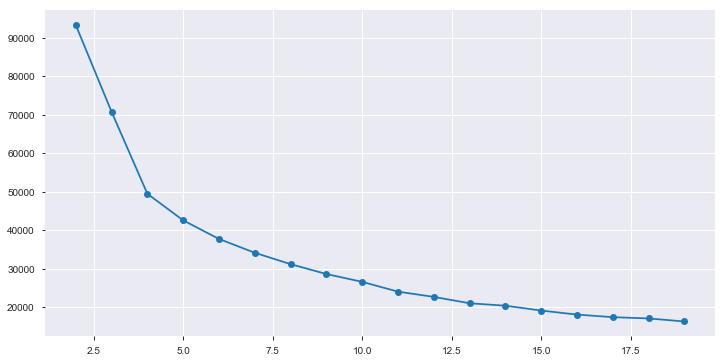

In [409]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

- **Thus, 4-cluster solution appears to be the best**

## Profiling

In [410]:
size=pd.concat([pd.Series(card.cluster_3.size), pd.Series.sort_index(card.cluster_3.value_counts()),
           pd.Series.sort_index(card.cluster_4.value_counts()), pd.Series.sort_index(card.cluster_5.value_counts()),
            pd.Series.sort_index(card.cluster_6.value_counts()), pd.Series.sort_index(card.cluster_7.value_counts()),
            pd.Series.sort_index(card.cluster_8.value_counts())])

In [411]:
size

0    8950
0    2204
1    3322
2    3424
0    1869
1    2088
2    2224
3    2769
0    1862
1    1977
2    2081
3     881
4    2149
0    1923
1     660
2    1587
3    2011
4     864
5    1905
0    1927
1    2072
2     593
3    1633
4    1176
5     850
6     699
0     825
1    1571
2     686
3    1025
4    1967
5    1904
6     421
7     551
dtype: int64

In [412]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/card.cluster_3.size, columns=['Seg_Pct'])

In [413]:
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950,2204,3322,3424,1869,2088,2224,2769,1862,1977,...,850,699,825,1571,686,1025,1967,1904,421,551


In [414]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.246257,0.371173,0.38257,0.208827,0.233296,0.248492,0.309385,0.208045,0.220894,...,0.094972,0.078101,0.092179,0.175531,0.076648,0.114525,0.219777,0.212737,0.047039,0.061564


In [415]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.0,2204.000000,3322.000000,3424.00000,1869.000000,2088.000000,2224.000000,2769.000000,1862.000000,1977.000000,...,850.000000,699.000000,825.000000,1571.000000,686.000000,1025.000000,1967.000000,1904.000000,421.000000,551.000000
Seg_Pct,1.0,0.246257,0.371173,0.38257,0.208827,0.233296,0.248492,0.309385,0.208045,0.220894,...,0.094972,0.078101,0.092179,0.175531,0.076648,0.114525,0.219777,0.212737,0.047039,0.061564


In [416]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([card.apply(lambda x: x.mean()).T,card.groupby('cluster_3').apply(lambda x: x.mean()).T,
          card.groupby('cluster_4').apply(lambda x: x.mean()).T, 
                card.groupby('cluster_5').apply(lambda x: x.mean()).T,
                            card.groupby('cluster_6').apply(lambda x: x.mean()).T,
                               card.groupby('cluster_7').apply(lambda x: x.mean()).T,
                                       card.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [417]:
Profling_output

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
BALANCE_FREQUENCY,0.619940,0.583288,0.607926,0.655188,0.594656,0.624200,0.584123,0.662560,0.593699,0.656097,...,0.680416,0.662882,0.680445,0.628841,0.662221,0.614790,0.641615,0.664316,0.677855,0.185933
ONEOFF_PURCHASES,3.204274,0.000000,1.916684,6.516072,5.833221,0.012665,0.000000,6.410082,5.827805,6.498424,...,5.907165,5.556121,6.205091,0.000000,5.546799,6.178639,0.000000,6.528267,0.000000,1.798589
INSTALLMENTS_PURCHASES,3.352403,5.772676,0.093127,4.956678,0.001718,0.078034,5.759469,6.149803,0.007447,6.219865,...,5.979391,0.000000,5.970330,5.908215,0.000000,0.001943,0.000000,6.256654,5.712465,2.680713
PURCHASES_FREQUENCY,0.361268,0.517957,0.056483,0.556113,0.257423,0.003265,0.515046,0.577805,0.256591,0.585957,...,0.556479,0.216733,0.558416,0.559365,0.212258,0.311962,0.000146,0.592472,0.476164,0.180941
ONEOFF_PURCHASES_FREQUENCY,0.158699,0.000000,0.052951,0.363450,0.257240,0.000405,0.000000,0.339014,0.256367,0.356956,...,0.282218,0.216627,0.298256,0.000000,0.212150,0.311628,0.000000,0.361284,0.000000,0.038939
PURCHASES_INSTALLMENTS_FREQUENCY,0.270072,0.495407,0.003157,0.383989,0.000043,0.002465,0.492551,0.475435,0.000201,0.481127,...,0.463155,0.000000,0.461325,0.538251,0.000000,0.000078,0.000146,0.487277,0.446601,0.135739
CASH_ADVANCE_FREQUENCY,0.113512,0.037672,0.201400,0.077061,0.104121,0.233284,0.039934,0.088633,0.101140,0.010489,...,0.292062,0.267479,0.279021,0.002057,0.270953,0.009409,0.235081,0.008902,0.233472,0.016970
CASH_ADVANCE_TRX,0.817570,0.281928,1.430933,0.567267,0.734439,1.670713,0.296037,0.649242,0.719206,0.092626,...,2.067197,1.861302,2.007354,0.017873,1.881838,0.084134,1.680736,0.080016,1.698026,0.150090
PURCHASES_TRX,1.894731,2.307147,0.438720,3.041898,1.616617,0.023045,2.297815,3.170070,1.613106,3.213108,...,3.042193,1.494298,3.067387,2.428380,1.474218,1.830226,0.000352,3.240915,2.220957,1.122592
Monthly_average_purchase,3.050877,3.396551,1.097879,4.723188,3.474472,0.037554,3.384036,4.769610,3.469302,4.843614,...,4.544445,3.232055,4.588748,3.522248,3.223199,3.789328,0.000000,4.876808,3.352748,2.167064


In [418]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [419]:
Profling_output_final

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,8950.000000,2204.000000,3322.000000,3424.000000,1869.000000,2088.000000,2224.000000,2769.000000,1862.000000,1977.000000,...,850.000000,699.000000,825.000000,1571.000000,686.000000,1025.000000,1967.000000,1904.000000,421.000000,551.000000
Seg_Pct,1.000000,0.246257,0.371173,0.382570,0.208827,0.233296,0.248492,0.309385,0.208045,0.220894,...,0.094972,0.078101,0.092179,0.175531,0.076648,0.114525,0.219777,0.212737,0.047039,0.061564
BALANCE_FREQUENCY,0.619940,0.583288,0.607926,0.655188,0.594656,0.624200,0.584123,0.662560,0.593699,0.656097,...,0.680416,0.662882,0.680445,0.628841,0.662221,0.614790,0.641615,0.664316,0.677855,0.185933
ONEOFF_PURCHASES,3.204274,0.000000,1.916684,6.516072,5.833221,0.012665,0.000000,6.410082,5.827805,6.498424,...,5.907165,5.556121,6.205091,0.000000,5.546799,6.178639,0.000000,6.528267,0.000000,1.798589
INSTALLMENTS_PURCHASES,3.352403,5.772676,0.093127,4.956678,0.001718,0.078034,5.759469,6.149803,0.007447,6.219865,...,5.979391,0.000000,5.970330,5.908215,0.000000,0.001943,0.000000,6.256654,5.712465,2.680713
PURCHASES_FREQUENCY,0.361268,0.517957,0.056483,0.556113,0.257423,0.003265,0.515046,0.577805,0.256591,0.585957,...,0.556479,0.216733,0.558416,0.559365,0.212258,0.311962,0.000146,0.592472,0.476164,0.180941
ONEOFF_PURCHASES_FREQUENCY,0.158699,0.000000,0.052951,0.363450,0.257240,0.000405,0.000000,0.339014,0.256367,0.356956,...,0.282218,0.216627,0.298256,0.000000,0.212150,0.311628,0.000000,0.361284,0.000000,0.038939
PURCHASES_INSTALLMENTS_FREQUENCY,0.270072,0.495407,0.003157,0.383989,0.000043,0.002465,0.492551,0.475435,0.000201,0.481127,...,0.463155,0.000000,0.461325,0.538251,0.000000,0.000078,0.000146,0.487277,0.446601,0.135739
CASH_ADVANCE_FREQUENCY,0.113512,0.037672,0.201400,0.077061,0.104121,0.233284,0.039934,0.088633,0.101140,0.010489,...,0.292062,0.267479,0.279021,0.002057,0.270953,0.009409,0.235081,0.008902,0.233472,0.016970
CASH_ADVANCE_TRX,0.817570,0.281928,1.430933,0.567267,0.734439,1.670713,0.296037,0.649242,0.719206,0.092626,...,2.067197,1.861302,2.007354,0.017873,1.881838,0.084134,1.680736,0.080016,1.698026,0.150090


In [420]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 
                                 'KM3_1', 'KM3_2', 'KM3_3',
                                 'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                 'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                 'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                 'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6', 'KM7_7',
                                 'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6', 'KM8_7','KM8_8'
                                ]

In [421]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,8950.000000,2204.000000,3322.000000,3424.000000,1869.000000,2088.000000,2224.000000,2769.000000,1862.000000,1977.000000,...,850.000000,699.000000,825.000000,1571.000000,686.000000,1025.000000,1967.000000,1904.000000,421.000000,551.000000
Seg_Pct,1.000000,0.246257,0.371173,0.382570,0.208827,0.233296,0.248492,0.309385,0.208045,0.220894,...,0.094972,0.078101,0.092179,0.175531,0.076648,0.114525,0.219777,0.212737,0.047039,0.061564
BALANCE_FREQUENCY,0.619940,0.583288,0.607926,0.655188,0.594656,0.624200,0.584123,0.662560,0.593699,0.656097,...,0.680416,0.662882,0.680445,0.628841,0.662221,0.614790,0.641615,0.664316,0.677855,0.185933
ONEOFF_PURCHASES,3.204274,0.000000,1.916684,6.516072,5.833221,0.012665,0.000000,6.410082,5.827805,6.498424,...,5.907165,5.556121,6.205091,0.000000,5.546799,6.178639,0.000000,6.528267,0.000000,1.798589
INSTALLMENTS_PURCHASES,3.352403,5.772676,0.093127,4.956678,0.001718,0.078034,5.759469,6.149803,0.007447,6.219865,...,5.979391,0.000000,5.970330,5.908215,0.000000,0.001943,0.000000,6.256654,5.712465,2.680713
PURCHASES_FREQUENCY,0.361268,0.517957,0.056483,0.556113,0.257423,0.003265,0.515046,0.577805,0.256591,0.585957,...,0.556479,0.216733,0.558416,0.559365,0.212258,0.311962,0.000146,0.592472,0.476164,0.180941
ONEOFF_PURCHASES_FREQUENCY,0.158699,0.000000,0.052951,0.363450,0.257240,0.000405,0.000000,0.339014,0.256367,0.356956,...,0.282218,0.216627,0.298256,0.000000,0.212150,0.311628,0.000000,0.361284,0.000000,0.038939
PURCHASES_INSTALLMENTS_FREQUENCY,0.270072,0.495407,0.003157,0.383989,0.000043,0.002465,0.492551,0.475435,0.000201,0.481127,...,0.463155,0.000000,0.461325,0.538251,0.000000,0.000078,0.000146,0.487277,0.446601,0.135739
CASH_ADVANCE_FREQUENCY,0.113512,0.037672,0.201400,0.077061,0.104121,0.233284,0.039934,0.088633,0.101140,0.010489,...,0.292062,0.267479,0.279021,0.002057,0.270953,0.009409,0.235081,0.008902,0.233472,0.016970
CASH_ADVANCE_TRX,0.817570,0.281928,1.430933,0.567267,0.734439,1.670713,0.296037,0.649242,0.719206,0.092626,...,2.067197,1.861302,2.007354,0.017873,1.881838,0.084134,1.680736,0.080016,1.698026,0.150090


In [423]:
#Profling_output_final.to_csv('Profiling_output2.csv')

## Conclusion

                                                     **INSIGHTS OF CLUSTER 4 **

- **Cluster KM4_1**:  This cluster contributes 21% to the customer base and mainly focuses on customers having high one off     
     purchases.

   These customers have purchase type of installment and they have on-off purchases.
   This group is risky as it has maximum one off purchases , installment frequency is minimum.
   

- **Cluster KM4_2**: This cluster contributes 23%  to the customer base and focuses on customers who take cash advance.

    These customers  take monthly cash advance amount.
    Since these customers take cash advance, provide them less interest rate.
    

- **Cluster KM4_3** : This cluster contributes 25% to the customer base and includes customers who  make installment  purcahses 
    
    They  make no one off purchases.
    They can be given reward points.


- **Cluster KM4_4**:  This cluster contributes 31%  to the customer base and includes customers who make puchases by both 
    types.
    
    This group is the best, they can be given loyalty/premium cards. Their credit limit can be increased and interest rate can     be lowered.
